<a href="https://colab.research.google.com/github/Yassaadel/Depi.gov/blob/master/Boston_House.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [58]:
data = pd.read_csv("/BostonHousing.csv")  # Remove the extra forward slash
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


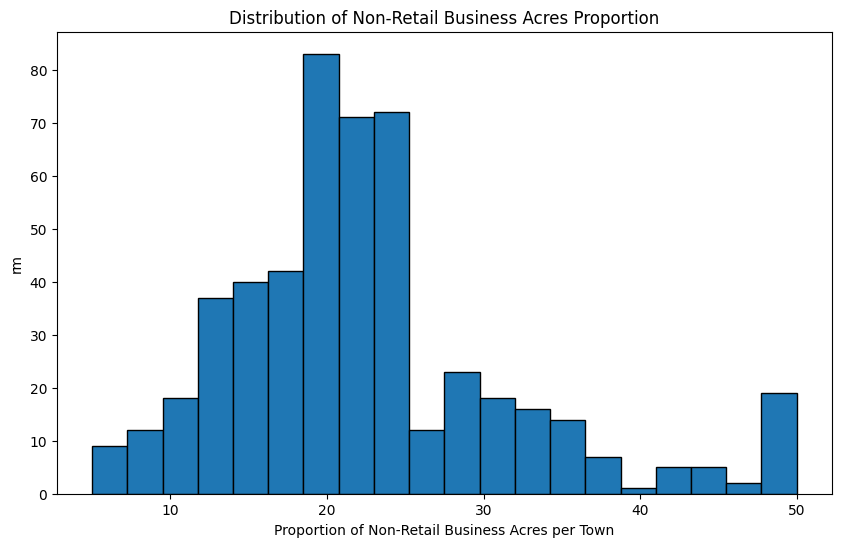

In [59]:
# @title Distribution of Non-Retail Business Acres Proportion

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(data['medv'], bins=20, edgecolor='black')
plt.xlabel('Proportion of Non-Retail Business Acres per Town')
plt.ylabel('rm')
_ = plt.title('Distribution of Non-Retail Business Acres Proportion')

In [60]:
# prompt: Using dataframe data: clean data

import pandas as pd
# Remove any rows with missing values
data = data.dropna()

# Remove duplicate rows
data = data.drop_duplicates()

# Convert categorical features to numerical using one-hot encoding
data = pd.get_dummies(data)

# Standardize numerical features to have zero mean and unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']
data[numerical_features] = scaler.fit_transform(data[numerical_features])


In [61]:
# prompt: Using dataframe data: check if clean

data.isnull().values.any() # Check for any null values in the dataframe


False

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 501 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     501 non-null    float64
 1   zn       501 non-null    float64
 2   indus    501 non-null    float64
 3   chas     501 non-null    int64  
 4   nox      501 non-null    float64
 5   rm       501 non-null    float64
 6   age      501 non-null    float64
 7   dis      501 non-null    float64
 8   rad      501 non-null    float64
 9   tax      501 non-null    float64
 10  ptratio  501 non-null    float64
 11  b        501 non-null    float64
 12  lstat    501 non-null    float64
 13  medv     501 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 58.7 KB


In [63]:
data['dis'].fillna(data['dis'].mean(), inplace=True)

<Axes: >

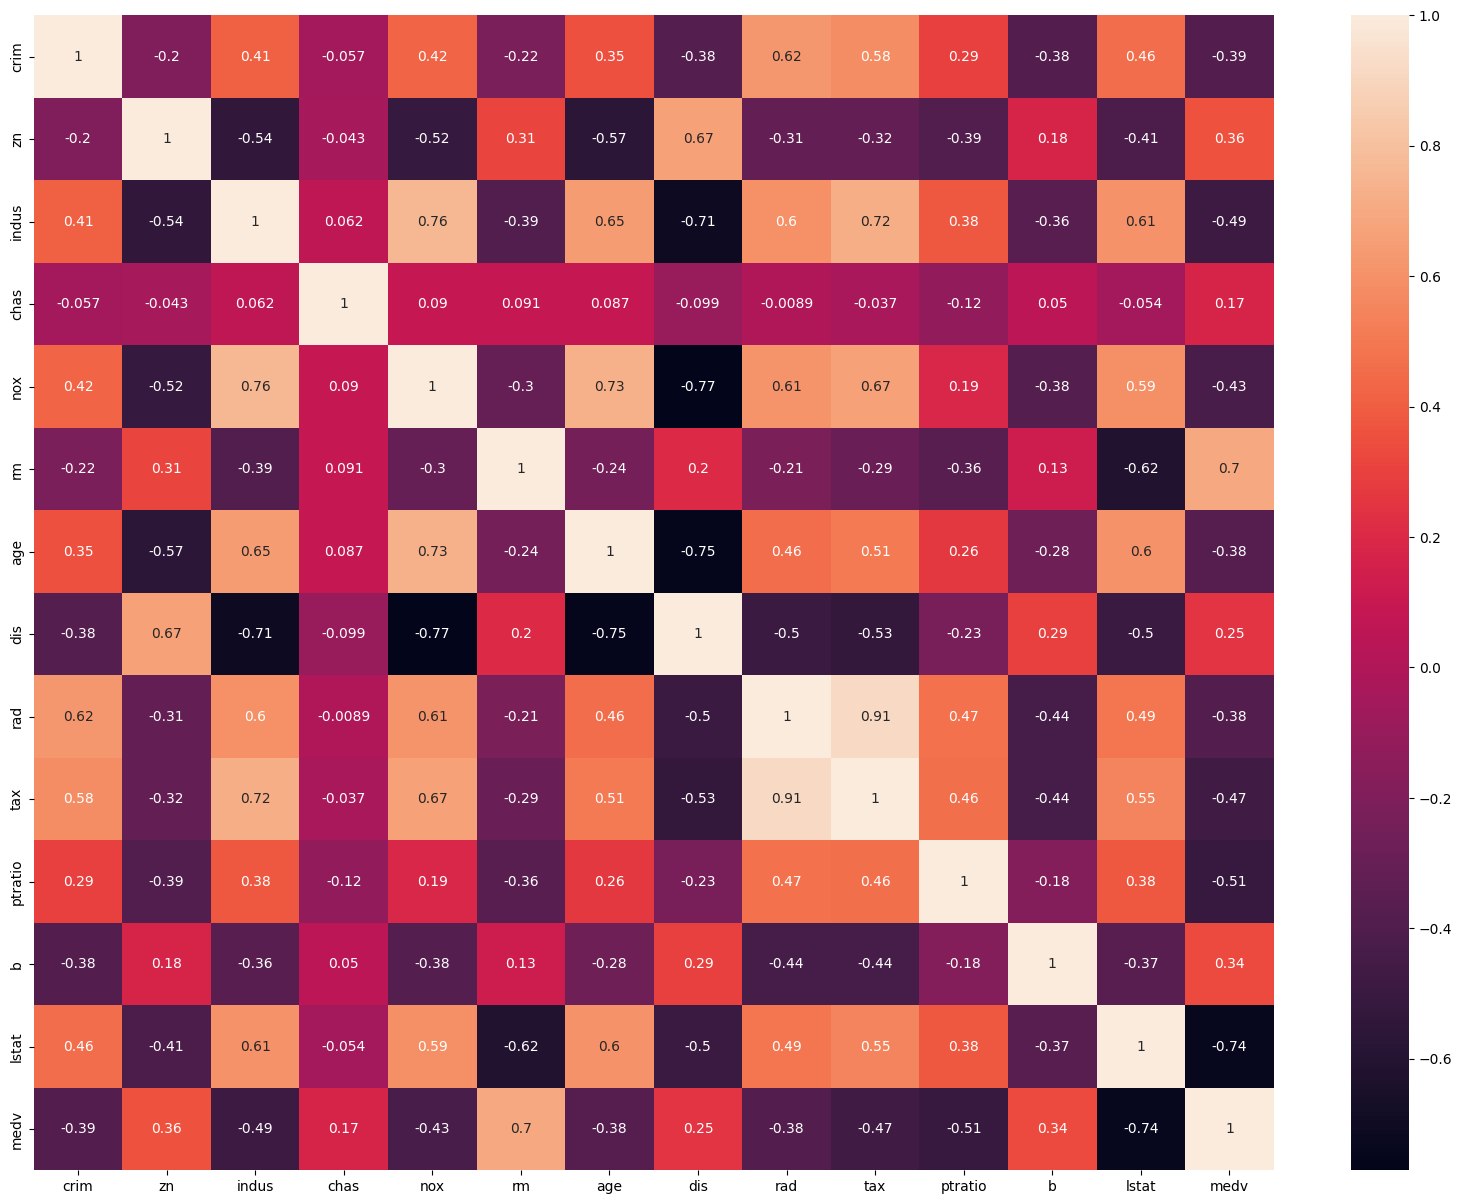

In [64]:

    plt.subplots(figsize=(20,15))
    sns.heatmap(data.corr(), annot=True)

In [65]:
data_dropped = data.drop(['age'], axis='columns')

# The rest of your code should now work as expected
inputs = data_dropped.drop('dis',axis='columns')
target = data_dropped.dis

In [71]:
inputs.isna().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
rad,0
tax,0
ptratio,0
b,0


In [72]:
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.3)

In [73]:
reg = LinearRegression()
reg.fit(X_train, y_train)

reg.score(X_test, y_test)

0.7545106881472105

In [74]:
from sklearn.metrics import mean_squared_error
y_predict=reg.predict(X_test)
mean_squared_error(y_test, y_predict)

0.2246332783302549

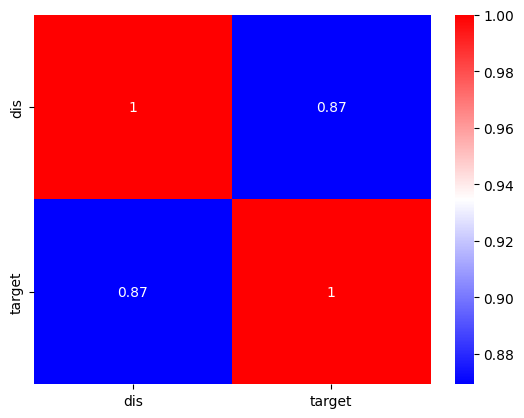

In [91]:
data = pd.DataFrame(y_test)
data['target'] = y_predict
# Calculate correlation matrix
corr_matrix = data.corr()

# Visualize correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='bwr')
plt.show()

In [105]:
scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

# Train a Gaussian Naive Bayes model
nb_model = GaussianNB()

# Convert the pandas Series to a NumPy array and then to integers
# if the target variable represents categories
y_train_int = y_train.values.astype(int) # Modified line

nb_model.fit(X_train, y_train_int)

# Predict using the trained model
y_predicty = nb_model.predict(X_test)

In [106]:
mean_squared_error(y_test, y_predicty)

0.4640401352087014

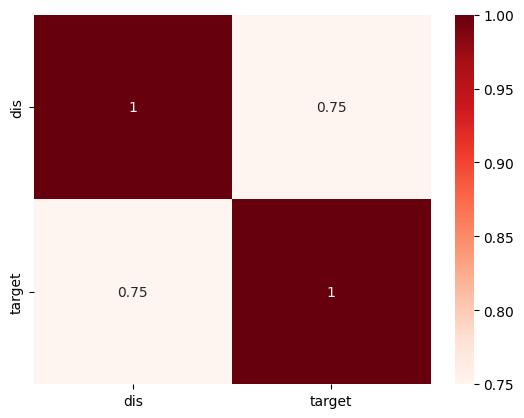

In [107]:
data = pd.DataFrame(y_test)
data['target'] = y_predicty
# Calculate correlation matrix
corr_matrix = data.corr()

# Visualize correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='Reds')
plt.show()

In [102]:
clf = DecisionTreeRegressor() # Changed to Regressor

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_predictx = clf.predict(X_test)

In [86]:
clf.score(X_test,y_test)

0.8476652689968502

In [103]:
mean_squared_error(y_test, y_predictx)

0.13066820397397463

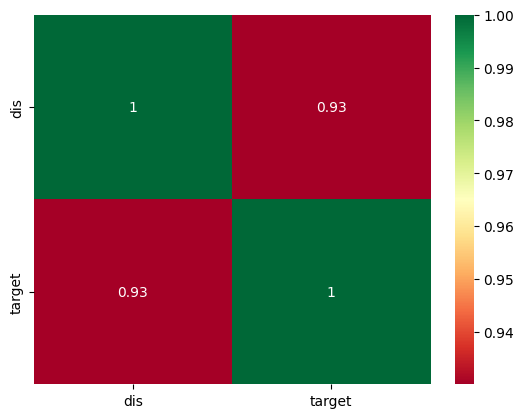

In [104]:
data = pd.DataFrame(y_test)
data['target'] = y_predictx
# Calculate correlation matrix
corr_matrix = data.corr()

# Visualize correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn')
plt.show()

In [99]:
df = RandomForestRegressor(criterion='squared_error', # Use appropriate criterion for regression
                             n_estimators=500)
df.fit(X_train, y_train)
y_predictf = df.predict(X_test)

In [100]:
mean_squared_error(y_test, y_predictf)

0.06772602636935152

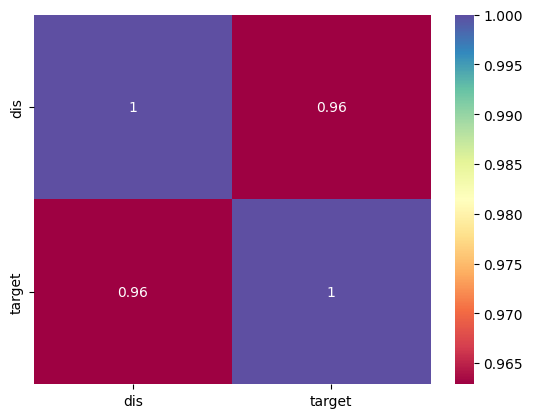

In [101]:
data = pd.DataFrame(y_test)
data['target'] = y_predictf
# Calculate correlation matrix
corr_matrix = data.corr()

# Visualize correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='Spectral')
plt.show()